# BAX Emittance Minimization (LCLS-II)
In this notebook, we hope to demonstrate Bayesian Algorithm Execution (BAX) in Xopt as a means of minimizing the emittance at LCLS-II. BAX is a generalization of Bayesian Optimization that seeks to acquire observations that provide our model with maximal information about our property of interest. In this example, our property of interest is the minimal emittance and its location in tuning-parameter-space. See https://arxiv.org/pdf/2209.04587.pdf for details.

In [1]:
# set up env for running on SLAC production servers
import os
os.environ['OMP_NUM_THREADS']=str(6)

In [2]:
run_dir = '/home/physics/ml_tuning/20240321_LCLS_II_Injector'

# Read pv info from YAML files

In [3]:
import sys
import yaml
sys.path.append("../../")
sys.path.append("../../../")

from common import get_pv_objects, save_reference_point, set_magnet_strengths, \
    measure_pvs

In [4]:
pv_bounds = yaml.safe_load(open("../../pv_bounds.yml"))
pv_objects = get_pv_objects("../../tracked_pvs.yml")

In [5]:
pv_bounds

{'QUAD:GUNB:212:1:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:212:2:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:823:1:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:823:2:BCTRL': [-0.005, 0.005],
 'QUAD:HTR:120:BCTRL': [-4.48, 1],
 'QUAD:HTR:140:BCTRL': [-4.4778, 4.4762],
 'QUAD:HTR:300:BCTRL': [-4.46035, 4.4692],
 'QUAD:HTR:320:BCTRL': [-4.46919, 4.4792],
 'SOLN:GUNB:212:BCTRL': [0.044, 0.044574],
 'SOLN:GUNB:823:BCTRL': [0.021, 0.0255]}

# load reference point
Also define a function to write the reference values to the pvs

In [6]:
reference = yaml.safe_load(open("../../reference.yml"))

def reset_pvs():
    set_magnet_strengths(reference, pv_objects, validate=False)

In [7]:
reference

{'QUAD:GUNB:212:1:BCTRL': 0.0023,
 'QUAD:GUNB:212:2:BCTRL': 0.0014125000000000001,
 'QUAD:GUNB:823:1:BCTRL': 0.003,
 'QUAD:GUNB:823:2:BCTRL': 0.0033875,
 'QUAD:HTR:120:BCTRL': -2.2331855578374693,
 'QUAD:HTR:140:BCTRL': 2.01213981773302,
 'QUAD:HTR:300:BCTRL': 1.1807187770838672,
 'QUAD:HTR:320:BCTRL': -2.0934402913247743,
 'SOLN:GUNB:212:BCTRL': 0.0442,
 'SOLN:GUNB:823:BCTRL': 0.025}

In [8]:
reset_pvs()

QUAD:GUNB:212:1:BCTRL 0.0023
QUAD:GUNB:212:2:BCTRL 0.0014125000000000001
QUAD:GUNB:823:1:BCTRL 0.003
QUAD:GUNB:823:2:BCTRL 0.0033875
QUAD:HTR:120:BCTRL -2.2331855578374693
QUAD:HTR:140:BCTRL 2.01213981773302
QUAD:HTR:300:BCTRL 1.1807187770838672
QUAD:HTR:320:BCTRL -2.0934402913247743
SOLN:GUNB:212:BCTRL 0.0442
SOLN:GUNB:823:BCTRL 0.025


In [9]:
from scripts.image import ImageDiagnostic, ROI
import yaml

fname = 'otr_diagnostic.yml' #run_dir + "OTRS_HTR_330_config.yml"

roi = ROI(
    ycenter=967,
    xcenter=878,
    xwidth=600,
    ywidth=600
)
    

image_diagnostic = ImageDiagnostic.parse_obj(yaml.safe_load(open(fname)))
image_diagnostic.roi = roi
image_diagnostic.min_log_intensity = 5.0
image_diagnostic.save_image_location = run_dir
image_diagnostic.n_fitting_restarts = 2
image_diagnostic.visualize = False
print(image_diagnostic.yaml())


screen_name: OTRS:HTR:330
array_data_suffix: Image:ArrayData
array_n_cols_suffix: Image:ArraySize0_RBV
array_n_rows_suffix: Image:ArraySize1_RBV
resolution_suffix: RESOLUTION
resolution: 19.24
beam_shutter_pv: TPR:LGUN:TS01:0:TRG00_SYS2_TCTL
extra_pvs: []
background_file: null
save_image_location: /home/physics/ml_tuning/20240321_LCLS_II_Injector
roi: {xcenter: 878, ycenter: 967, xwidth: 600, ywidth: 600}
min_log_intensity: 5.0
bounding_box_half_width: 3.0
wait_time: 1.0
n_fitting_restarts: 2
visualize: false
return_statistics: false
threshold: 0.0
apply_bounding_box_constraint: true
testing: false



In [10]:
image_diagnostic.measure_background()

array([[0. , 0. , 0. , ..., 0. , 0. , 0.4],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.2, ..., 0.4, 0. , 0. ]])

displaying image
fitting image
{'Cx': 299.7854462492793,
 'Cy': 300.510242048819,
 'Sx': 8.895169759915204,
 'Sy': 12.612369430402493,
 'bb_penalty': -253.158430116575,
 'log10_total_intensity': 5.642720470800589,
 'total_intensity': 439258.8000000001}


{'Cx': 299.7854462492793,
 'Cy': 300.510242048819,
 'Sx': 171.1430661807685,
 'Sy': 242.66198784094397,
 'bb_penalty': -253.158430116575,
 'total_intensity': 439258.8000000001,
 'log10_total_intensity': 5.642720470800589}

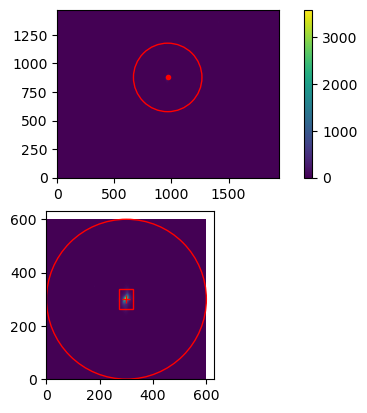

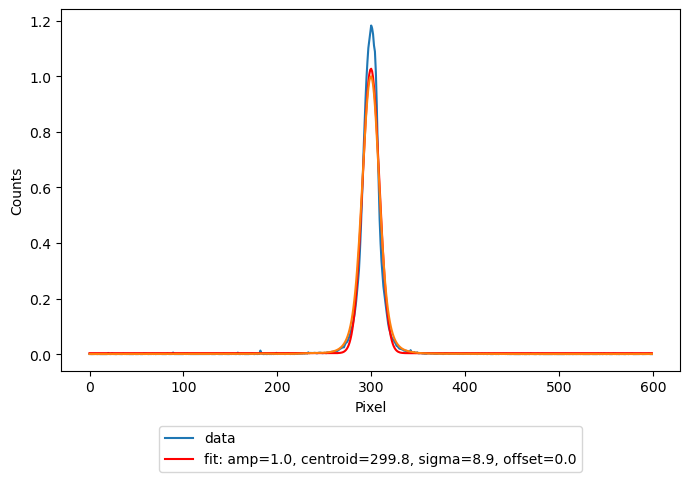

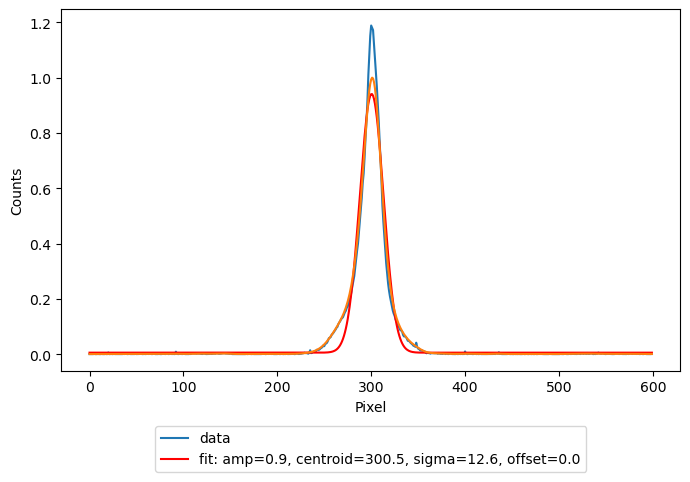

In [11]:
image_diagnostic.test_measurement()

# Imports

In [12]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")
import torch
from xopt import Xopt
from xopt.vocs import VOCS
from xopt.evaluator import Evaluator
import numpy as np
import random

# Evaluator

In [13]:
import time
# define function to measure the total size on OTR4
def eval_beamsize(inputs):
    
    # set pvs and wait for BACT to settle to correct values (validate=True)
    set_magnet_strengths(inputs, pv_objects, validate=True)
    time.sleep(0.5)
    # measure all pvs - except for names in inputs
    results = measure_pvs(
        [name for name in pv_objects.keys() if name not in inputs], pv_objects 
    )

    # do some calculations
    results["time"] = time.time()

    # add beam size measurement to results dict
    beamsize_results = image_diagnostic.measure_beamsize(1)
    results["Sx_mm"] = np.array(beamsize_results["Sx"]) * 1e-3
    results["Sy_mm"] = np.array(beamsize_results["Sy"]) * 1e-3

    #add beam size squared (mm^2)
    results["xrms_sq"] = results["Sx_mm"]**2
    results["yrms_sq"] = results["Sy_mm"]**2
    results = beamsize_results | results
    return results

evaluator = Evaluator(function=eval_beamsize)


In [14]:
eval_beamsize({})

fitting image


{'Cx': 299.1058951244136,
 'Cy': 298.295553704653,
 'Sx': 187.50867299371592,
 'Sy': 257.14963040967103,
 'bb_penalty': -248.4714830059258,
 'total_intensity': 403306.80000000005,
 'log10_total_intensity': 5.6056355445406725,
 'save_filename': '/home/physics/ml_tuning/20240321_LCLS_II_Injector/OTRS_HTR_330_1711021688.h5',
 'QUAD:HTR:140:BCTRL': 2.01213981773302,
 'QUAD:HTR:300:BCTRL': 1.1807187770838672,
 'QUAD:HTR:320:BCTRL': -2.0934402913247743,
 'SOLN:GUNB:212:BCTRL': 0.0442,
 'QUAD:GUNB:212:1:BCTRL': 0.0023,
 'QUAD:GUNB:212:2:BCTRL': 0.0014125000000000001,
 'SOLN:GUNB:823:BCTRL': 0.025,
 'QUAD:GUNB:823:1:BCTRL': 0.003,
 'QUAD:GUNB:823:2:BCTRL': 0.0033875,
 'ACCL:GUNB:455:PDES': -126.7,
 'ACCL:L0B:0110:ADES': 6.5,
 'ACCL:L0B:0110:PDES': 0.0,
 'ACCL:L0B:0130:PDES': 0.0,
 'QUAD:HTR:120:BCTRL': -2.2331855578374693,
 'time': 1711021688.7192144,
 'Sx_mm': 0.18750867299371593,
 'Sy_mm': 0.25714963040967104,
 'xrms_sq': 0.035159502447864296,
 'yrms_sq': 0.0661259324198304}

## VOCS

In [15]:
# create Xopt objects
from xopt import VOCS

IMAGE_CONSTRAINTS = {
            "bb_penalty": ["LESS_THAN", 0.0],
        }

vocs = VOCS(
    variables = {
        'QUAD:HTR:120:BCTRL': [-3.0,-1.0],
        'QUAD:HTR:140:BCTRL': [-4.4778, 4.4762],
         'QUAD:HTR:300:BCTRL': [-4.46035, 4.4692],
         'QUAD:HTR:320:BCTRL': [-4.46919, 4.4792],
    },
    constraints = IMAGE_CONSTRAINTS,
    observables = ["xrms_sq", "yrms_sq"],
)
vocs.variable_names

['QUAD:HTR:120:BCTRL',
 'QUAD:HTR:140:BCTRL',
 'QUAD:HTR:300:BCTRL',
 'QUAD:HTR:320:BCTRL']

# Run Bayesian Exploration on a grid

In [16]:
from gpytorch.kernels import MaternKernel, PolynomialKernel, ScaleKernel
from xopt.generators.bayesian.bayesian_exploration import BayesianExplorationGenerator
from xopt.numerical_optimizer import GridOptimizer
from xopt.generators.bayesian.models.standard import StandardModelConstructor
from copy import deepcopy
sys.path.append("../../emitopt/")

meas_dim = 4
tuning_dims = [0,1,2,3,5,6]

covar_module = (MaternKernel(ard_num_dims=len(tuning_dims),
                              active_dims=tuning_dims,
                              lengthscale_prior=None) *
                              PolynomialKernel(power=2, active_dims=[meas_dim])
                 )
scaled_covar_module = ScaleKernel(covar_module)

# prepare options for Xopt generator
covar_module_dict = {
    'xrms_sq': scaled_covar_module,
    "yrms_sq": deepcopy(scaled_covar_module)
}
# covar_module_dict = {}
model_constructor = StandardModelConstructor(
    #covar_modules=covar_module_dict, 
    use_low_noise_prior=False
)

generator = BayesianExplorationGenerator(
    vocs=vocs,
    gp_constructor=model_constructor,
    numerical_optimizer=GridOptimizer(n_grid_points=10),
    n_interpolate_points=5
)

from xopt import Xopt
X_bayes_exp = Xopt(
    vocs=vocs,
    generator=generator,
    evaluator=evaluator,
    strict=True,
    dump_file = "bayes_exp_matching_nominal.yml"
)

## sample in local area around reference point

In [17]:
from epics import caget_many
from xopt.utils import get_local_region

reset_pvs()
current_value = dict(
    zip(
        X_bayes_exp.vocs.variable_names,
        caget_many(X_bayes_exp.vocs.variable_names)
    )
)
print(current_value)


random_sample_region = get_local_region(current_value,X_bayes_exp.vocs, fraction=0.1)
X_bayes_exp.random_evaluate(10, custom_bounds=random_sample_region)

QUAD:GUNB:212:1:BCTRL 0.0023
QUAD:GUNB:212:2:BCTRL 0.0014125000000000001
QUAD:GUNB:823:1:BCTRL 0.003
QUAD:GUNB:823:2:BCTRL 0.0033875
QUAD:HTR:120:BCTRL -2.2331855578374693
QUAD:HTR:140:BCTRL 2.01213981773302
QUAD:HTR:300:BCTRL 1.1807187770838672
QUAD:HTR:320:BCTRL -2.0934402913247743
SOLN:GUNB:212:BCTRL 0.0442
SOLN:GUNB:823:BCTRL 0.025
{'QUAD:HTR:120:BCTRL': -2.2331855578374693, 'QUAD:HTR:140:BCTRL': 2.01213981773302, 'QUAD:HTR:300:BCTRL': 1.1807187770838672, 'QUAD:HTR:320:BCTRL': -2.0934402913247743}
QUAD:HTR:120:BCTRL -2.37127188291009
QUAD:HTR:140:BCTRL 2.661237523459946
QUAD:HTR:300:BCTRL 0.8770095593502683
QUAD:HTR:320:BCTRL -2.42970929705322
fitting image
QUAD:HTR:120:BCTRL -2.281357411864869
QUAD:HTR:140:BCTRL 1.1552100276077735
QUAD:HTR:300:BCTRL 1.301960073753447
QUAD:HTR:320:BCTRL -2.6452823818837707
fitting image
QUAD:HTR:120:BCTRL -2.421007012807621
QUAD:HTR:140:BCTRL 2.8398363725240507
QUAD:HTR:300:BCTRL 1.2816367941573676
QUAD:HTR:320:BCTRL -2.0947175650518717
fitting ima

,QUAD:HTR:120:BCTRL,QUAD:HTR:140:BCTRL,QUAD:HTR:300:BCTRL,QUAD:HTR:320:BCTRL,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,...,ACCL:L0B:0110:ADES,ACCL:L0B:0110:PDES,ACCL:L0B:0130:PDES,time,Sx_mm,Sy_mm,xrms_sq,yrms_sq,xopt_runtime,xopt_error
0,-2.371272,2.661238,0.877010,-2.429709,318.305349,304.044048,259.366057,183.810089,-232.763031,464457.2,...,6.5,0.0,0.0,1.711022e+09,0.259366,0.183810,0.067271,0.033786,3.252198,False
1,-2.281357,1.155210,1.301960,-2.645282,282.801223,305.561624,480.759380,475.733378,-178.130262,392058.6,...,6.5,0.0,0.0,1.711022e+09,0.480759,0.475733,0.231130,0.226322,3.974725,False
2,-2.421007,2.839836,1.281637,-2.094718,319.081362,305.087010,291.441627,196.869679,-226.217247,476037.6,...,6.5,0.0,0.0,1.711022e+09,0.291442,0.196870,0.084938,0.038758,5.000918,False
3,-2.342056,1.699321,0.947544,-1.843499,292.716198,300.837378,293.618007,357.707076,-222.404595,419148.8,...,6.5,0.0,0.0,1.711022e+09,0.293618,0.357707,0.086212,0.127954,3.961827,False
4,-2.249951,2.529585,1.605747,-2.606746,312.561630,298.864976,218.098231,183.097031,-244.774966,425395.2,...,6.5,0.0,0.0,1.711022e+09,0.218098,0.183097,0.047567,0.033525,3.068492,False
5,-2.425868,2.580733,1.500185,-2.615168,313.781366,302.041642,210.447611,233.914358,-239.547348,440233.0,...,6.5,0.0,0.0,1.711022e+09,0.210448,0.233914,0.044288,0.054716,2.940138,False
6,-2.204849,1.172868,1.212815,-2.494983,275.398298,299.740418,422.247502,451.254434,-185.252807,397225.2,...,6.5,0.0,0.0,1.711022e+09,0.422248,0.451254,0.178293,0.203631,4.119676,False
7,-2.153761,1.236544,0.792289,-2.896919,278.684198,301.991921,590.721847,408.141830,-168.955952,359602.8,...,6.5,0.0,0.0,1.711022e+09,0.590722,0.408142,0.348952,0.166580,2.908247,False
8,-2.154971,2.293055,0.578384,-1.218731,308.413409,297.731446,160.590943,187.414687,-254.056137,443201.6,...,6.5,0.0,0.0,1.711022e+09,0.160591,0.187415,0.025789,0.035124,4.983964,False
9,-2.208449,1.804031,0.535298,-1.964115,294.726053,301.367715,285.638014,276.436309,-233.224832,431686.2,...,6.5,0.0,0.0,1.711022e+09,0.285638,0.276436,0.081589,0.076417,6.000685,False


In [20]:
import time
start = time.time()
for i in range(20):
    X_bayes_exp.step()
print(time.time() - start)

QUAD:HTR:120:BCTRL -2.688881993293762
QUAD:HTR:140:BCTRL 0.8945981502532959
QUAD:HTR:300:BCTRL -1.285395860671997
QUAD:HTR:320:BCTRL 4.0814845085144045
fitting image
QUAD:HTR:120:BCTRL -2.3777740001678467
QUAD:HTR:140:BCTRL 0.29766612052917485
QUAD:HTR:300:BCTRL -0.09479188919067383
QUAD:HTR:320:BCTRL 3.6837791442871093
fitting image
QUAD:HTR:120:BCTRL -2.066666007041931
QUAD:HTR:140:BCTRL -0.29926590919494656
QUAD:HTR:300:BCTRL 1.0958120822906499
QUAD:HTR:320:BCTRL 3.286073780059814
fitting image
QUAD:HTR:120:BCTRL -1.7555580139160156
QUAD:HTR:140:BCTRL -0.8961979389190673
QUAD:HTR:300:BCTRL 2.2864160537719727
QUAD:HTR:320:BCTRL 2.8883684158325194
fitting image
QUAD:HTR:120:BCTRL -1.4444500207901
QUAD:HTR:140:BCTRL -1.4931299686431885
QUAD:HTR:300:BCTRL 3.477020025253296
QUAD:HTR:320:BCTRL 2.4906630516052246
fitting image
QUAD:HTR:120:BCTRL -1.7555580139160156
QUAD:HTR:140:BCTRL -0.4982432842254638
QUAD:HTR:300:BCTRL 3.278586006164551
QUAD:HTR:320:BCTRL 1.0986944198608397
fitting imag

In [19]:
X_bayes_exp.dump_file = "bayes_exp_matching_nominal.yml"
X_bayes_exp.dump()